# Sesión 11
> Por Christian Rubio Montiel (CRM)
Implementación por Moisés Borjan Ramírez, Josue Río Campos Becerra, Oscar David Domínguez Dávila, Luis Ramos Guerrero y Kevin Martin Rivera Castro y CRM

En esta sesión se continúa con el algoritmo Heapsort. Se aborda como guardar una función en Julia: [GuardarFunciones](https://www.dropbox.com/scl/fo/4i2m2ggvilcm26iv7ew7a/h?rlkey=sf5azd2mqcxjkvn76u1ho5y1k&dl=0).

<a id='indice'></a>
### Índice
---
1. **[Construyendo un max-heap](#ConstruyendoUnHeap)**
2. **[Heapsort](#heap-sort)**
3. **[Experimentación en el tiempo de ejecución](#experimentacion)**
4. **[Referencias](#referencias)**
---

In [1]:
function LEFT(i)
    return 2*i
end

function RIGHT(i)
    return 2*i+1
end

function PARENT(i)
    return div(i,2)
end

PARENT (generic function with 1 method)

In [2]:
function MAX_HEAPIFY(A,i,heapSizeA)
    l = LEFT(i)
    r = RIGHT(i)
    if l <= heapSizeA && A[l] > A[i]
        largest = l
    else
        largest = i
    end
    if r <= heapSizeA && A[r] > A[largest]
        largest = r
    end
    if largest != i
        A[i], A[largest] = A[largest], A[i]
        MAX_HEAPIFY(A,largest,heapSizeA)
    end
end

MAX_HEAPIFY (generic function with 1 method)

<a id='ConstruyendoUnHeap'></a>
## 1. Construyendo un heap

La siguiente rutina toma como entrada un arreglo $A$ y da como salida el arreglo $A$ como un max-heap.

*BUILT-MAX-HEAP($A$)*
1. $heapSize[A]=lenght[A]$
2. **for** $i=\left\lfloor \frac{lenght[A]}{2}\right\rfloor$ downto $1$ **do**
3. $\hspace{0.6cm}$ MAX-HEAPIFY($A$,$i$)

La línea 1 define de una manera alternativa la longitud del arreglo que queda como constante durante la rutina así como en la subrutina MAX-HEAPIFY (a lo que se le verá su utilidad en la última rutina). La línea 2 es un ciclo **for** que recorre el arreglo $A$ de la mitad hacia el elemento en la posición 1, esto es porque las hojas forman un max-heap, entonces el último elemento que no es hoja está en la posición $\left\lfloor \frac{n}{2}\right\rfloor$, al que le aplica la subrutina MAX-HEAPIFY de la línea 3 para que esté en un max-heap. Inductivamente, se llaga a la posición 1 donde sus hijos están en max-heaps por lo que la línea termina con $A$ siendo un max-heap, por lo que el algoritmo es correcto.

Analizar el tiempo de ejecución no resulta tan sencillo. Por sencillez, vamos a suponer que el árbol completo tiene raíz $v$, radio $k$ tal que todas sus hojas están en el nivel $N^k(v)$, por lo que $n=2^{k+1}-1$.

La línea 3 se ejecuta $2^{k-1}$ veces (en el nivel $k-1$) y en cada ocasión el tiempo de ejecución de MAX-HEAPIFY hace 1 movimiento en el peor de los casos. En general, la línea 3 se ejecuta $2^{k-i}$ veces (en el nivel $i$) y en cada ocasión el tiempo de ejecución de MAX-HEAPIFY hace $k-i$ movimientos en el peor de los casos (la distancia del vértice en ese nivel a las hojas). Dicho de otro modo, las líneas 2 y 3 se ejecutan a lo más

$$1\cdot 2^{k-1}+2\cdot 2^{k-2}+\dots+i\cdot 2^{k-i}+\dots+k\cdot 1$$

veces. Más formalmente, el tiempo de ejecución $T(n)$ está acotado superiormente por $O(\sum_{i=1}^{k} i2^{k-i})$. Aproximemos esta suma de la siguiente forma:

Por un lado, $2^{k-i}=\frac{2^k}{2^i}=\frac{2^{k+1}}{2\cdot2^{i}}=\frac{n+1}{2\cdot2^{i}}=\frac{n+1}{2}\cdot\frac{1}{2^{i}}$.

Entonces, $\sum_{i=1}^{k} i2^{k-i}=\frac{n+1}{2} \sum_{i=1}^{k} \frac{i}{2^i}$.

Como $\sum_{i=1}^{k} \frac{i}{2^i}=\frac{k}{2^k}+\frac{k-1}{2^{k-1}}+\dots+\frac{3}{2^3}+\frac{2}{2^2}+\frac{1}{2}=$

$\frac{1}{2^k}+\frac{1}{2^{k-1}}+\dots+\frac{1}{2^3}+\frac{1}{2^2}+\frac{1}{2}$

$\frac{1}{2^k}+\frac{1}{2^{k-1}}+\dots+\frac{1}{2^3}+\frac{1}{2^2}$

$\frac{1}{2^k}+\frac{1}{2^{k-1}}+\dots+\frac{1}{2^3}$

$...$

$\frac{1}{2^k}+\frac{1}{2^{k-1}}$

$\frac{1}{2^k}=$

$1-\frac{1}{2^k}+\frac{1}{2}-\frac{1}{2^k}+\frac{1}{2^2}-\frac{1}{2^k}+\dots+\frac{1}{2^{k-2}}-\frac{1}{2^k}+\frac{1}{2^{k-1}}-\frac{1}{2^k}=1+\frac{1}{2}+\frac{1}{2^2}+\dots+\frac{1}{2^{k-2}}+\frac{1}{2^{k-1}}-\frac{k}{2^k}=$

$2-\frac{k}{2^{k-1}}-\frac{k}{2^k}=2-\frac{k+2}{2^k}$

Luego, $\sum_{i=1}^{k} i2^{k-i}=\frac{n+1}{2} (2-\frac{k+2}{2^k})=n+1-(n+1)\frac{k+2}{2^{k+1}}=n+1-(k+2)=n-k-1=n-\lg(n+1)$, por lo que $T(n)=O(n)$.

In [3]:
function BUILT_MAX_HEAP(A)
    heapSizeA = length(A)
    for i in div(length(A),2):-1:1
        MAX_HEAPIFY(A,i,heapSizeA)
    end
end

BUILT_MAX_HEAP (generic function with 1 method)

Regresar al **[Índice](#indice)**.

<a id='heap-sort'></a>
   ## 2. Heapsort

Ya estamos preparados para analizar el algoritmo HEAP_SORT, el cual recibe de entrada un arreglo $A$

*HEAPSORT($A$)*
1. BUILT_MAX_HEAP($A$)
2. **for** $i$=$length[A]$ downto $2$ **do**
3. $\hspace{0.6cm}$ exchange($A[1],A[i]$)
4. $\hspace{0.6cm}heapSize[A]=heapSize[A]-1$
5. $\hspace{0.6cm}$ MAX-HEAPIFY($A$,$1$)

El algoritmo contruye un max-heap, por lo que el elemento máximo del arreglo está en la raíz. El ciclo **for** va disminuyendo $n$ en cada paso, intercambiando el máximo a la última posición, luego recorta el árbol y actualiza el max-heap en la última línea. 

El tiempo de ejecución es relativamente sencillo calcularlo. Las líneas 1-4 son lineales, mientras que la línea 5 es $\theta(n\lg(n))$ que define el tiempo de ejecución de HEAPSORT.

In [4]:
function HEAPSORT(A)
    BUILT_MAX_HEAP(A)
    heapSizeA = length(A)
    for i in length(A):-1:2
        A[1], A[i] = A[i], A[1]
        heapSizeA = heapSizeA - 1
        MAX_HEAPIFY(A,1,heapSizeA)
    end
    length(A)
end

HEAPSORT (generic function with 1 method)

Aquí, conviene hecer un ejemplo donde se ejecute línea a línea el algoritmo. Considere $A=[1,5,6,2,3,7,7,10,0,2,1,1,5,8]$ y pida a los alumnos que le vayan diciendo los pasos a seguir. Ver [Heapsort Dance](https://youtu.be/Xw2D9aJRBY4)

In [5]:
A = [1,5,6,2,3,7,7,10,0,2,1,1,5,8];

In [6]:
HEAPSORT(A);
A

14-element Vector{Int64}:
  0
  1
  1
  1
  2
  2
  3
  5
  5
  6
  7
  7
  8
 10

Regresar al **[Índice](#indice)**.

<a id='experimentacion'></a>
## 3. Experimentación en el tiempo de ejecución

Vamos a realizar 16 ejecuciones del algoritmo para entradas Aj de tamaño 100000j con entradas aleatorias con $j\in\{1,\dots,16\}$.

In [7]:
y = []
for j in 1:16
    Aj = rand(1000000*j)
push!(y,@elapsed HEAPSORT(Aj))
    println(length(Aj)," ",y[j])
end

1000000 0.115552625
2000000 0.266745125
3000000 0.505228834
4000000 0.857543375
5000000 1.128924916
6000000 1.438991417
7000000 1.865245791
8000000 2.293864209
9000000 2.79364275
10000000 3.241824167
11000000 3.765144458
12000000 4.32402525
13000000 4.858324083
14000000 5.403438333
15000000 5.980697833
16000000 6.597452167


In [8]:
using Plots

A continuación, graficaremos los puntos $(n,time)$ donde $n$ corresponde al tamaño del arreglo y para fines prácticos, redondearemos los tiempos. 

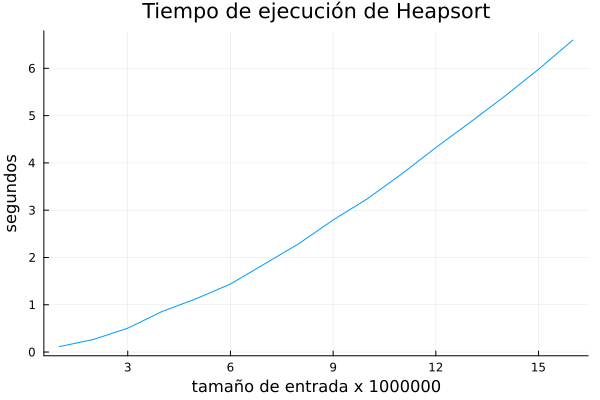

In [9]:
x = range(1, 16, length = 16)
plot(x, y, legend = false)
xaxis!("tamaño de entrada x 1000000")
yaxis!("segundos")
title!("Tiempo de ejecución de Heapsort")

De acuerdo a nuestro análisis, el tiempo de Heapsort es de orden $\theta(n\lg(n))$, así que ahora ajustaremos una curva de la forma $a_0+a_1\lg(n)+a_2n+a_3n\lg(n)$ vía mínimos cuadrados (en color rojo) y la dibujaremos encima de la curva azul, ver [$[1]$](#referencias).

In [10]:
M = zeros(4, 4)
M[1, 1] = 16
M[1, 2] = sum(log2.(x))
M[1, 3] = sum(x)
M[1, 4] = sum(x .* log2.(x))
M[2, 1] = sum(log2.(x))
M[2, 2] = sum(log2.(x) .^ 2)
M[2, 3] = sum(x .* log2.(x))
M[2, 4] = sum(x .* (log2.(x) .^ 2) )
M[3, 1] = sum(x)
M[3, 2] = sum(x .* log2.(x))
M[3, 3] = sum(x .^ 2)
M[3, 4] = sum((x .^ 2) .* log2.(x))
M[4, 1] = sum(x .* log2.(x))
M[4, 2] = sum(x .* (log2.(x) .^ 2) )
M[4, 3] = sum((x .^ 2) .* log2.(x))
M[4, 4] = sum((x .^ 2) .* (log2.(x) .^ 2))
S=M^(-1)*[sum(y), sum(y .* log2.(x)), sum(y .* x),sum((y .* x) .* log2.(x))];

In [11]:
P(x) = S[1] + S[2]*log2(x) + S[3]*x + S[4]*x*log2(x)

P (generic function with 1 method)

In [12]:
S

4-element Vector{Float64}:
  0.5205157782289753
  0.22322179842460815
 -0.41073244794377184
  0.18368215242216196

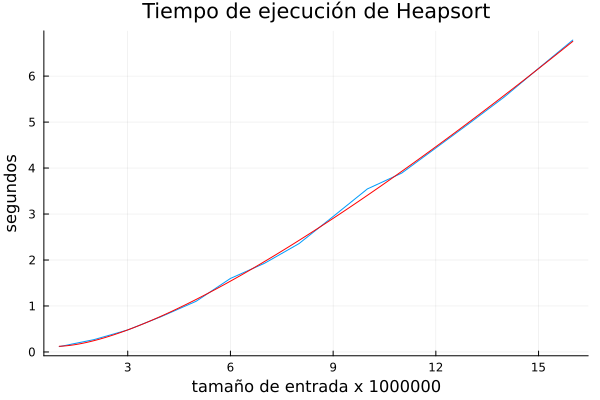

In [14]:
w = range(1, 16, length = 1000)
z = P.(w)
plot!(w, z, color = :red)

Regresar al **[Índice](#indice)**.

<a id='referencias'></a>
## 4. Referencias

$[1]$ Burden, R. L., Faires, J. D., Rurden, A. (2015). **Numerical analysis**. Cengage Learning, 10E.

$[2]$ Cormen, T. H., Leiserson, C. E., Rivest, R. L. y Stein C. (2022). **Introduction to algorithms**. MIT Press, 4E.